# MNIST handwritten digit database

In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.8.0


In [24]:
from keras.datasets import mnist

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [26]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

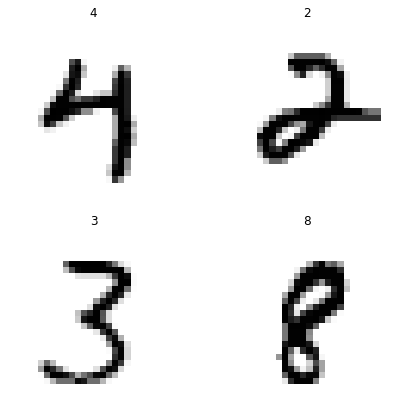

In [27]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [30]:
X_train.shape

(60000, 784)

In [31]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [32]:
X_train.shape

(60000, 784)

In [33]:
from keras.utils.np_utils import to_categorical

In [34]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [35]:
y_train_cat.shape

(60000, 10)

In [36]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0.0, 1.0)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fitting the model
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 5s 6ms/step - loss: 0.3250 - accuracy: 0.8999 - val_loss: 0.1377 - val_accuracy: 0.9578
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.1130 - val_accuracy: 0.9673
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9790 - val_loss: 0.1113 - val_accuracy: 0.9676
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.1047 - val_accuracy: 0.9737
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.1270 - val_accuracy: 0.9683
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.1415 - val_accuracy: 0.9694
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0239 - accuracy: 0.9926 - val_loss: 0.1349 - val_accuracy: 0.9722
Epoch 

In [38]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9721


0.972100019454956

In [46]:
from sklearn.preprocessing import OneHotEncoder

oneHot = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False)

oneHot.fit(y_train.reshape(-1, 1))

y_train_OH = oneHot.transform(y_train.reshape(-1, 1))
y_test_OH = oneHot.transform(y_test.reshape(-1, 1))

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import keras.backend as K


# Set random seed
tf.random.set_seed(42)

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fitting the model
h = model.fit(X_train, y_train_OH, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 [==============================] - 3s 7ms/step - loss: 0.3238 - accuracy: 0.9011 - val_loss: 0.2428 - val_accuracy: 0.9252
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.1097 - accuracy: 0.9665 - val_loss: 0.1056 - val_accuracy: 0.9681
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0728 - accuracy: 0.9777 - val_loss: 0.1158 - val_accuracy: 0.9688
Epoch 4/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0496 - accuracy: 0.9842 - val_loss: 0.1094 - val_accuracy: 0.9725
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.1138 - val_accuracy: 0.9727
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.1235 - val_accuracy: 0.9728
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.1258 - val_accuracy: 0.9749
Epoch 

In [41]:
test_accuracy = model.evaluate(X_test, y_test_OH)[1]
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.9767


0.9767000079154968